In [1]:
pip install vaderSentiment 

Note: you may need to restart the kernel to use updated packages.


In this Task, I have performed sentimental analysis, using VADER 

# <font color='blue'>Data Collection</font>

**Importing libraries.**

**BeautifulSoup (bs4)**: It loads the given webpage in its HTML form. We can then inspect and search for the
data of interest and its pattern, and extract the required data from the elements through their HTML tag.

**Request**: Request loads the requested page, after which elements can be extracted from the page.

In [2]:
import csv
from bs4 import BeautifulSoup
import requests
import pandas as pd
import time
time.sleep(2)
import warnings
warnings.filterwarnings('ignore')

Links to the webpages to get the data (reviews and rating) from. 

**Below are the links, which is assigned to me.** 

In [3]:
urls = []
url1 = 'https://www.imdb.com/title/tt0081398/reviews/?ref_=tt_ql_2'
url2 = 'https://www.imdb.com/title/tt0035446/reviews/?ref_=tt_ql_2'
url3 = 'https://www.imdb.com/title/tt5039054/reviews/?ref_=tt_ql_2'
url4 = 'https://www.imdb.com/title/tt5504168/reviews/?ref_=tt_ql_2'
url5 = 'https://www.imdb.com/title/tt0050976/reviews/?ref_=tt_ql_2'
url6 = 'https://www.imdb.com/title/tt0118688/reviews/?ref_=tt_ql_2'
url7 = 'https://www.imdb.com/title/tt15136528/reviews/?ref_=tt_ql_2'

In [4]:
urls.append(url1)
urls.append(url2)
urls.append(url3)
urls.append(url4)
urls.append(url5)
urls.append(url6)
urls.append(url7)

In [5]:
content = []
for url in urls:
    page = requests.get(url, timeout=2.50)
    page_content = page.content
    soup = BeautifulSoup(page_content, 'html.parser')
    content.append(soup.find_all('div', class_= 'review-container'))

Now, inspect the web page using 'Inspect' tool. Right click the web page and select 'Inspect', use 'Elements'
tab. We are looking for a pattern, to get the reviews and ratings. Place the cursor and it will highlight the data
on the web page like 'I am here' marker. In this case, we can see that the following tags contain the
information we are after, which are rating and review

       # <div class = "lister-item-content"> or <div class = "review-container">

Print 'content' to inspect what it contains.
Similarly, using 'Inspect' tool, we can see that we are also interested in:

       <span></span>, <span class="point-scale">, <a class="title">

In [1]:
#print(content)

Now, as we now our data structure, let's define a dataframe say 'movie' that has two columns 'Review' and
'Rating' to store user review and user rating.
Define a dataframe called 'movie' to store movie reviews and the ratings. For a review, if the rating is not
given, we ignore that review.

In [7]:
movie = pd.DataFrame(columns=['Review','Rating'])

In [8]:
review = []
rating = []
count = 0
for cc in content:
    for c in cc:    
        count+= 1   
    
        print('\nMovie review ', count)
        #Get review.
        str = c.find_all('a', attrs={'class':'title'})      
        rReview =''
        for s in str:
            #print('Review is: ',s.get_text())
            rReview = s.get_text()
      
        #Get rating.
        ratings = c.find_all('span', attrs={'class':''})
        rVal = []
        for r in ratings:
            str1 = r.get_text().strip()
            rVal.append(str1)
    
        val = rVal[0]
        if(len(val) > 2):
            continue     
        else:
            review.append(rReview)
            rating.append(val)
            print('Review: ', rReview)
            print('Rating: ',val) 
        
movie['Review'] = review
movie['Rating'] = rating


Movie review  1
Review:   Essential masterpiece; powerful De Niro; simply one of the best films of all time.

Rating:  10

Movie review  2

Movie review  3

Movie review  4
Review:   Scorcese robbed

Rating:  5

Movie review  5
Review:   Bovine Pugilist & Paranoid Misogynist...

Rating:  8

Movie review  6

Movie review  7
Review:   Not My Favorite Scorsese

Rating:  7

Movie review  8
Review:   Easy to Admire, Difficult to Love

Rating:  7

Movie review  9
Review:   I just didn't find the plot that interesting

Rating:  5

Movie review  10
Review:   It doesn't get much better than this

Rating:  10

Movie review  11
Review:   It really is harder to Stay At the Top than to Reach the Top; just because Life has No Justice.

Rating:  9

Movie review  12

Movie review  13
Review:   Don't believe the hype

Rating:  5

Movie review  14
Review:   Like a train wreck you just can't stop watching...

Rating:  9

Movie review  15
Review:   Another Scorsese masterpiece!

Rating:  10

Movie review

In [9]:
movie.head()

,Review,Rating
0,Essential masterpiece; powerful De Niro; simp...,10
1,Scorcese robbed\n,5
2,Bovine Pugilist & Paranoid Misogynist...\n,8
3,Not My Favorite Scorsese\n,7
4,"Easy to Admire, Difficult to Love\n",7


In [10]:
movie.shape

(126, 2)

In [50]:
movie.to_csv('KinzaWaheed--2313970', index=False)

# <font color='blue'>Text Processing and Analysis</font>

In [12]:
import string
import re
#import nltk
#nltk.download()
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split

**Importing nltk (Natural Language Processing took kit ) is the most important process in sentiment analysis. As we know the computer works
with binary data. To help computer understand the human language. It creates dummy variables for all the alphabets,
and it has a word cloud net commonly known as Dictionary from where it learns about the different meaning of the words
that we use.**

In [13]:
textFeatures = movie['Review'].copy()
textFeatures.shape

(126,)

In [14]:
#Preparing text for Wordcloud
text = []
for t in textFeatures:
  text.append(t)
all_text = ', '.join(t for t in text)
#print(all_text)
print(len(all_text))

5119


In [15]:
pip install wordcloud

In [16]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**stopwords are usullay the articles in the sentence "the","at","on","a". They do not give any meaningfull information from a 
sentence, we can remove it while analysing for sentiment analysis.**

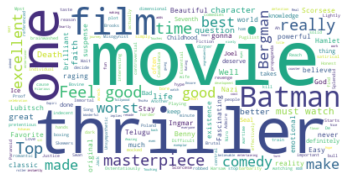

In [17]:
# Create stopword list
stopwords = set(STOPWORDS)
stopwords.update(["br", "im", "thats"]) #"im","lol","Xa","film"])
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(all_text)
# Display the image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
#save the generated image to a file
#wordcloud.to_file("wordcloud_cb_all.png")

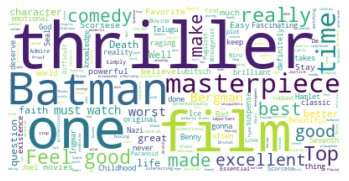

In [18]:
# Create stopword list
stopwords = set(STOPWORDS)
stopwords.update(["br", "im", "thats","movie"]) #"im","lol","Xa","film"])
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(all_text)
# Display the image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
#save the generated image to a file
#wordcloud.to_file("wordcloud_cb_all.png")

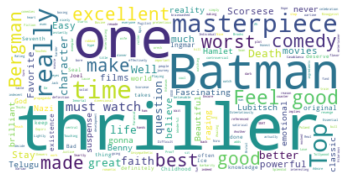

In [19]:
# Create stopword list
stopwords = set(STOPWORDS)
stopwords.update(["br", "im", "thats","movie", "film"]) #"im","lol","Xa","film"])
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(all_text)
# Display the image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
#save the generated image to a file
#wordcloud.to_file("wordcloud_cb_all.png")

# <font color='blue'>Sentiment Identification using VADER</font>

In [20]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\2313970\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


**In the follwing code, we run a sentiment intensity analyzer. and run a while loop (as condition attached to it) to see the 
results as positive, negative and neutral.**

In [21]:
sid = SentimentIntensityAnalyzer()
c = 0
for t in text:
    c+=1
    print(c, t)
    ss = sid.polarity_scores(t)
    print(ss)
    
    if(ss['compound'] >= 0.05):
        print('positive')
 
    elif(ss['compound'] <= -0.05):
        print('negative')
    else:
        print('neutral')
    print('\n')

1  Essential masterpiece; powerful De Niro; simply one of the best films of all time.

{'neg': 0.0, 'neu': 0.498, 'pos': 0.502, 'compound': 0.9022}
positive


2  Scorcese robbed

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
neutral


3  Bovine Pugilist & Paranoid Misogynist...

{'neg': 0.4, 'neu': 0.6, 'pos': 0.0, 'compound': -0.25}
negative


4  Not My Favorite Scorsese

{'neg': 0.453, 'neu': 0.547, 'pos': 0.0, 'compound': -0.357}
negative


5  Easy to Admire, Difficult to Love

{'neg': 0.17, 'neu': 0.136, 'pos': 0.694, 'compound': 0.8271}
positive


6  I just didn't find the plot that interesting

{'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compound': 0.4019}
positive


7  It doesn't get much better than this

{'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'compound': -0.3412}
negative


8  It really is harder to Stay At the Top than to Reach the Top; just because Life has No Justice.

{'neg': 0.087, 'neu': 0.593, 'pos': 0.32, 'compound': 0.5994}
positive


9  Don't believe the hype



### <font color='Red'> Interpretation of Results </font>
Sometimes, this method gives you false answers. As, in the 6th review,
          **I just didn't find the plot that interesting**

     {'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compound': 0.4019}

VADER give it as postive or neutral review ,
But it is clearly visible that it is negative review 


# <font color='blue'>Sentiment Classification using Machine Learning </font>

### <font color='blue'>Prepare 'Truth Set' </font>

We will be using 'User Rating' as a truth set to evaluate the results. To prepare 'Truth Set', we'll define three
classes - 'positive', 'negative', and 'netural'. On the scale of 0 to 10, consider review being 'positvie' if the
rating is from 6 to 10, 'negative' if the rating is from 0 to 4, 'netural' if rating is 5. We add this information in a
new column called 'class-label'.

In [22]:
label = []
for r in movie['Rating']:
    r = int(r)
    if (r>5):
        label.append('1') #Positive
    elif(r<5):
        label.append('-1') #Negative
    elif(r==5):
        label.append('0') #Netural
movie['class-label'] = label

In [23]:
movie['class-label'].value_counts()

1     96
-1    22
0      8
Name: class-label, dtype: int64

### Try-For-Fun

In this workshop, we'll work on binary classification, where only two classes are considered 'positive (1)' and
'negative (-1)'. Ignore 'neutral (0)' class. However, the code in this notebook is adopted for multiclass
classification problem. You can try all the three classes for fun

In [24]:
movie = movie[movie['class-label']!='0']

In [25]:
movie['class-label'].value_counts()

1     96
-1    22
Name: class-label, dtype: int64

It means that there are 94 positive reviews and 22 negative reviews in the data. 

In [26]:
textFeatures = movie['Review'].copy()
textFeatures.shape

(118,)

In [27]:
pip install textblob

In [28]:
import nltk
nltk.download('punkt')
# Stemming using TextBlob library for stemming
from textblob import TextBlob

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\2313970\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [29]:
def textblob_tokenizer(input_str):
    blob = TextBlob(input_str.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens]
    return words

In [30]:
#Toy example: 
print(textblob_tokenizer('Q: studed studing!!! I miss uuuu! It&#039;s'))

['q', 'stude', 'stude', 'i', 'miss', 'uuuu', 'it', '039', 's']


The above Toy example demonstrates that TextBlob() function has converted given sentence into tokens or
words, converted upper case letters to lower case, and removed wild characters.

**Try it for Fun**

In [31]:
list = ['q', 'stude', 'stude', 'i', 'miss', 'uuuu', 'it', '039', 's']
len(list)

9

**Transforming text dataset into two matrix representations.**

In [32]:
#countvectorizer convers each review into a vector based on the word count.
countvectorizer = CountVectorizer(analyzer= 'word', stop_words= 'english', 
                                  tokenizer=textblob_tokenizer) 
#convers text into a vector based on tf-idf weighting scheme. 
tfidfvectorizer = TfidfVectorizer(analyzer= 'word', stop_words= 'english', 
                                  tokenizer=textblob_tokenizer) 

In [33]:
textFeatures

0       Essential masterpiece; powerful De Niro; simp...
2             Bovine Pugilist & Paranoid Misogynist...\n
3                             Not My Favorite Scorsese\n
4                    Easy to Admire, Difficult to Love\n
6                 It doesn't get much better than this\n
                             ...                        
121                                       Not That Bad\n
122                    1997 version of the 1966 series\n
123     Waste of time- didn't know what the director ...
124                                   Far from reality\n
125            Remains faithful to the original....!!!\n
Name: Review, Length: 118, dtype: object

In [34]:
count_matrix = countvectorizer.fit_transform(textFeatures) 
tfidf_matrix = tfidfvectorizer.fit_transform(textFeatures)

In [35]:
print(tfidf_matrix) 
#print elements of the matrix.

  (0, 259)	0.3129094339086301
  (0, 99)	0.29033350808461283
  (0, 31)	0.32721716572945664
  (0, 235)	0.3991233203943173
  (0, 178)	0.3991233203943173
  (0, 197)	0.36730434006348234
  (0, 165)	0.3129094339086301
  (0, 84)	0.3991233203943173
  (1, 169)	0.5
  (1, 188)	0.5
  (1, 203)	0.5
  (1, 35)	0.5
  (2, 227)	0.7071067811865476
  (2, 95)	0.7071067811865476
  (3, 160)	0.509851751230341
  (3, 69)	0.509851751230341
  (3, 16)	0.509851751230341
  (3, 77)	0.4692052592438232
  (4, 254)	0.46225230566505904
  (4, 32)	0.5426083705891261
  (4, 173)	0.444381725817527
  (4, 74)	0.5426083705891261
  (5, 146)	0.3557529856595107
  (5, 113)	0.32739158286763076
  (5, 154)	0.30726884734822524
  :	:
  (111, 44)	0.4297370593839082
  (111, 25)	0.323885470406262
  (111, 141)	0.3954774851088238
  (112, 6)	0.509549368826529
  (112, 54)	0.5536908057109353
  (112, 25)	0.41730728861133853
  (112, 255)	0.509549368826529
  (113, 22)	1.0
  (114, 231)	0.509851751230341
  (114, 271)	0.509851751230341
  (114, 7)	0.50985

Print the dimensions of the tfidf_matrix, x rows (number of reviews) and y columns (total words occur in the
entire dataset.)

In [36]:
print(tfidf_matrix.shape) 
print(count_matrix.shape)

(118, 289)
(118, 289)


## <font color='blue'> Build ML Models </font>

In [37]:
features_train, features_test, labels_train, labels_test = train_test_split(
    tfidf_matrix, movie['class-label'], test_size=0.3,random_state=8)
print(features_train.shape, features_test.shape, labels_train.shape, labels_test.shape)

(82, 289) (36, 289) (82,) (36,)


In [38]:
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn.metrics import accuracy_score

In [39]:
#SVM classifier
from sklearn.svm import SVC
print("\nEvaluation for SVM \n")
svc = SVC(kernel='sigmoid', gamma=1.0)
svc.fit(features_train, labels_train)
prediction = svc.predict(features_test)
acc = accuracy_score(labels_test,prediction)
print('Accuracy:', acc)
from sklearn.metrics import precision_score
prec = precision_score(labels_test,prediction, average='weighted')
print('Precision:', prec)
from sklearn.metrics import recall_score
recall = recall_score(labels_test,prediction, average='weighted')
print('Recall:', recall)
from sklearn.metrics import f1_score
f1 = f1_score(labels_test,prediction, average='weighted')
print('F-1 measure: ', f1)
print('\nConfusion Matrix:\n')
print(confusion_matrix(labels_test, prediction))  
print(classification_report(labels_test, prediction))
#print(prediction)


Evaluation for SVM 

Accuracy: 0.7777777777777778
Precision: 0.8285714285714286
Recall: 0.7777777777777778
F-1 measure:  0.703225806451613

Confusion Matrix:

[[ 1  8]
 [ 0 27]]
              precision    recall  f1-score   support

          -1       1.00      0.11      0.20         9
           1       0.77      1.00      0.87        27

    accuracy                           0.78        36
   macro avg       0.89      0.56      0.54        36
weighted avg       0.83      0.78      0.70        36



In [40]:
#Decision Tree
print("\nEvaluation for Decision Tree \n")
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(features_train, labels_train)
prediction = dtree.predict(features_test)
acc = accuracy_score(labels_test,prediction)
print('Accuracy: ', acc)
prec = precision_score(labels_test,prediction, average='weighted')
print('Precision: ', prec)
recall = recall_score(labels_test,prediction, average='weighted')
print('Recall: ', recall)
f1 = f1_score(labels_test,prediction, average='weighted')
print('F-1 measure: ',f1)
print('\nConfusion Matrix:\n')
print(confusion_matrix(labels_test, prediction))  
print(classification_report(labels_test, prediction))


Evaluation for Decision Tree 

Accuracy:  0.75
Precision:  0.6985294117647058
Recall:  0.75
F-1 measure:  0.6847988077496274

Confusion Matrix:

[[ 1  8]
 [ 1 26]]
              precision    recall  f1-score   support

          -1       0.50      0.11      0.18         9
           1       0.76      0.96      0.85        27

    accuracy                           0.75        36
   macro avg       0.63      0.54      0.52        36
weighted avg       0.70      0.75      0.68        36



**Try it Yourself**

**Filtering Movie data set to display only movies with positive reviews**

In [41]:
movie.head()

,Review,Rating,class-label
0,Essential masterpiece; powerful De Niro; simp...,10,1
2,Bovine Pugilist & Paranoid Misogynist...\n,8,1
3,Not My Favorite Scorsese\n,7,1
4,"Easy to Admire, Difficult to Love\n",7,1
6,It doesn't get much better than this\n,10,1


In [42]:
positive_movie= movie[movie['class-label'] == '1']
positive_movie.head()

,Review,Rating,class-label
0,Essential masterpiece; powerful De Niro; simp...,10,1
2,Bovine Pugilist & Paranoid Misogynist...\n,8,1
3,Not My Favorite Scorsese\n,7,1
4,"Easy to Admire, Difficult to Love\n",7,1
6,It doesn't get much better than this\n,10,1


In [43]:
#Generating positive review text
positiveReviews = positive_movie['Review'].copy()

In [44]:
#Preparing text from positivereviews for Wordcloud
text = []
for t in positiveReviews:
  text.append(t)
all_text = ', '.join(t for t in text)
#print(all_text1)
print(len(all_text))

3916


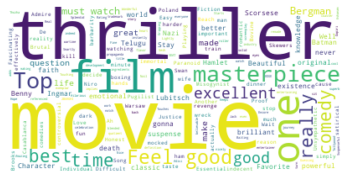

In [45]:
# Create stopword list
stopwords = set(STOPWORDS)
stopwords.update(["br", "im", "thats"]) #"im","lol","Xa","film"])
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(all_text)
# Display the image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
#save the generated image to a file
#wordcloud.to_file("wordcloud_cb_all.png")

**Filtering Movie data set to display only movies with negative reviews**

In [46]:
negative_movie= movie[movie['class-label'] == '-1']
negative_movie.head()

,Review,Rating,class-label
11,Ostentatiously pretentious with a one-dimensi...,4,-1
17,Mpst people are brainwashed\n,1,-1
18,raging bull? raging bore\n,1,-1
58,What were they going for?\n,1,-1
90,"Death takes knight, checkmate.\n",3,-1


In [47]:
#Generating negative review text
negativeReviews = negative_movie['Review'].copy()

In [48]:
#Preparing text from negative reviews for Wordcloud
text = []
for t in negativeReviews:
  text.append(t)
all_text = ', '.join(t for t in text)
#print(all_text1)
print(len(all_text))

939


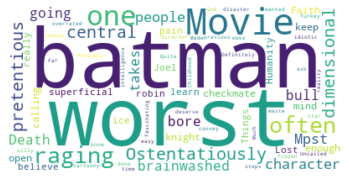

In [49]:
# Create stopword list
stopwords = set(STOPWORDS)
stopwords.update(["br", "im", "thats"]) #"im","lol","Xa","film"])
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(all_text)
# Display the image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
#save the generated image to a file
#wordcloud.to_file("wordcloud_cb_all.png")

## <font color='blue'> Report </font>

#### <font color='red'> Introduction of Sentiment Analysis </font>

To do the Sentiment Analysis, we extract the data from the user reviews of IMDB website. In this project, the following movie’s
user reviews are extracted and then performed sentiment analysis on it. 

This process is done in order to get positive, negative and neutral reviews of the movies from the audience textual data. 
Therefore, sentiment analysis is the process of extracting emotions from the opinion text data. 

There are multiple ways to do sentiment analysis. The one we used in this project is VADER. 

In this, we see how we use VADER to do sentiment Analysis. **VADER (Valence Aware Dictionary and sEntiment Reasoner)** is a tool
for sentimental analysis, which specifically detects the words in the sentences, and give results in two polarities; 
negative and positive. It is mostly used to detect the comments in social media and other analyser reviews. 
The most advantage of using VADER is; it does not require training data. 

    sid = SentimentIntensityAnalyzer()
    c = 0
    for t in text:
       c+=1
        print(c, t)
       ss = sid.polarity_scores(t)
       print(ss)
    
          if(ss['compound'] >= 0.05):
             print('positive')
 
          elif(ss['compound'] <= -0.05):
             print('negative')
          else:
             print('neutral')
    print('\n')
    
In this above code, **SentimentIntensityAnalyzer** is an object and **polarity scores** is a method which will give us results in positive, negative, neutral and compound. If the compound value is towards +1. It means the comment is positive. 

#### <font color='red'> Important Libraries for Sentiment Analysis </font>
**BeautifulSoup:** First of all we fetch the data from the IMDB website using the Beautiful Soup Python Package. It is used for web scrapping purpose to fetch the data from HTML. 
we first make the data 

**(nltk) Natural Language tool Kit:** This one is to make computer understand about the human language used in the reviews. 

**cloudwords** to make the graph of words 

**stopwords** to ignore the articles like is, at, the, a in the sentences. 

#### <font color='red'> Interpretation of Results  </font>

Some of the reviews are categoriezed into negative or positive review perftly for instance. 

   **Another Scorsese masterpiece!**

{'neg': 0.0, 'neu': 0.313, 'pos': 0.687, 'compound': 0.6588}
positive

See, here VADER gives it positive polarity score. and compound value is more towards the +1.

   **Starts really great, stays solid**

{'neg': 0.0, 'neu': 0.324, 'pos': 0.676, 'compound': 0.7397}
positive
 
Here it also categorized properly for positive review. 

Sometimes, this method gives you false answers. AS we can see in the 6th review,
       
   **I just didn't find the plot that interesting**

 {'neg': 0.0, 'neu': 0.69, 'pos': 0.31, 'compound': 0.4019}
 
VADER give it as postive or neutral review , But we can clearly see that it is negative review

Here we can see that its a neutral comment, but VADER categorized in compound as negative. 

   **Death never takes a holiday...**

{'neg': 0.565, 'neu': 0.435, 'pos': 0.0, 'compound': -0.5994}
negative

S, some of the times VADER took the words in consideration that is actually being said as sarcastic. So they did not define it 
properly. 



### References 

Anon., n.d. VaderSentiment. [Online] 
Available at: https://github.com/cjhutto/vaderSentiment
